In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series, DataFrame
import seaborn as sns

In [4]:
aapl = pdr.get_data_yahoo('AAPL')
goog = pdr.get_data_yahoo('GOOG')
msft = pdr.get_data_yahoo('MSFT')
amzn = pdr.get_data_yahoo('AMZN')

In [5]:
from datetime import datetime

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [13]:
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03,2264.000000
mean,100.274305,98.472527,99.404701,99.390734,8.013560e+07,88.966260
std,47.169053,46.394922,46.778399,46.783957,5.966194e+07,52.047819
min,28.000000,27.178572,27.481428,27.435715,1.147590e+07,18.372683
25%,62.176427,60.926072,61.632856,61.468929,3.441850e+07,45.855141
50%,95.532143,93.599998,94.619999,94.480003,6.340480e+07,86.628483
75%,126.834999,124.852499,125.912500,125.817503,1.076744e+08,118.175861
max,233.470001,229.779999,230.779999,232.070007,4.702495e+08,231.263092


In [14]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2009-12-31 to 2018-12-28
Data columns (total 6 columns):
High         2264 non-null float64
Low          2264 non-null float64
Open         2264 non-null float64
Close        2264 non-null float64
Volume       2264 non-null float64
Adj Close    2264 non-null float64
dtypes: float64(6)
memory usage: 123.8 KB


In [36]:
aapl_close = pd.DataFrame(aapl.Close)

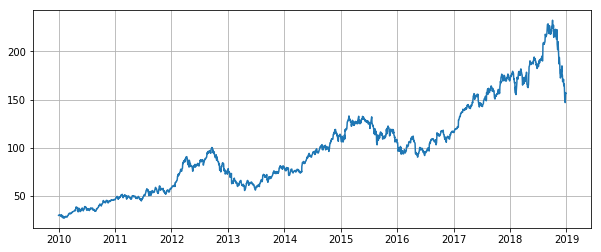

In [37]:
plt.figure(figsize=(10,4))
plt.grid(True)
plt.plot(aapl_close['Close'],label='AAPL')

In [38]:
aapl_open = pd.DataFrame(aapl.Open)

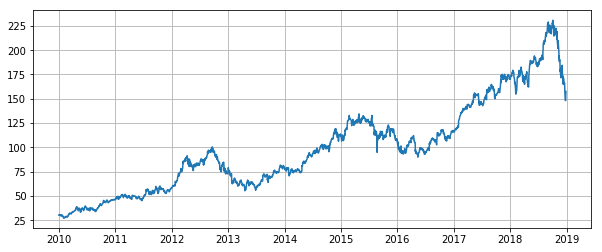

In [39]:
plt.figure(figsize=(10,4))
plt.grid(True)
plt.plot(aapl_open['Open'],label='AAPL')

In [40]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    aapl[column_name] = pd.rolling_mean(aapl['Adj Close'], ma)

/Users/kenmaru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
/Users/kenmaru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  after removing the cwd from sys.path.
/Users/kenmaru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  after removing the cwd from sys.path.


In [41]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,NaN,NaN,NaN,NaN
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,NaN,NaN,NaN,0.015565
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,NaN,NaN,NaN,0.001729
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,NaN,NaN,NaN,-0.015906
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,NaN,NaN,NaN,-0.001849


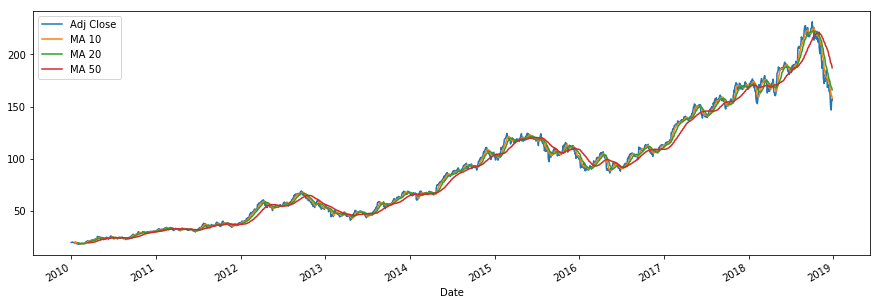

In [42]:
aapl[['Adj Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(15,5))

In [43]:
aapl['Daily Return'] = aapl['Adj Close'].pct_change()

In [44]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,NaN,NaN,NaN,NaN
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,NaN,NaN,NaN,0.015565
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,NaN,NaN,NaN,0.001729
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,NaN,NaN,NaN,-0.015906
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,NaN,NaN,NaN,-0.001849


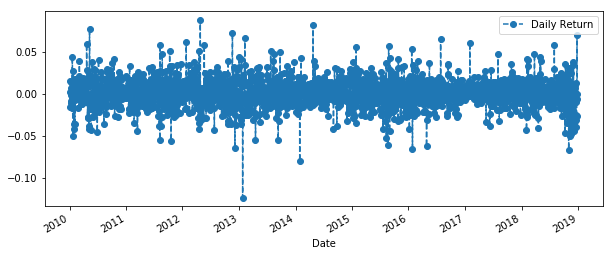

In [45]:
aapl['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

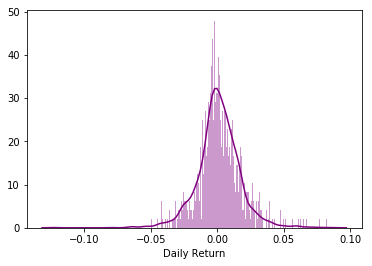

In [46]:
sns.distplot(aapl['Daily Return'].dropna(), bins=1000, color='purple')

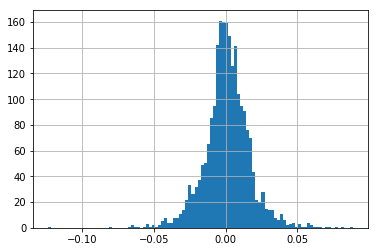

In [49]:
aapl['Daily Return'].hist(bins=100)

In [50]:
aapl_close['MA_9'] = aapl_close.Close.rolling(9).mean().shift()
aapl_close['MA_21'] = aapl_close.Close.rolling(21).mean()

In [30]:
closing_df = pdr.get_data(['AAPL', 'GOOG', 'MSFT','AMZN'])

AttributeError: module 'pandas_datareader' has no attribute 'get_data'

In [148]:
closing_df.head()

NameError: name 'closing_df' is not defined

In [34]:
aapl_close['MA_9'].head(12)

Date
2016-11-29           NaN
2016-11-30           NaN
2016-12-01           NaN
2016-12-02           NaN
2016-12-05           NaN
2016-12-06           NaN
2016-12-07           NaN
2016-12-08           NaN
2016-12-09           NaN
2016-12-12    110.836666
2016-12-13    111.041111
2016-12-14    111.560000
Name: MA_9, dtype: float64

In [35]:
aapl_close = pd.DataFrame(aapl.Close)

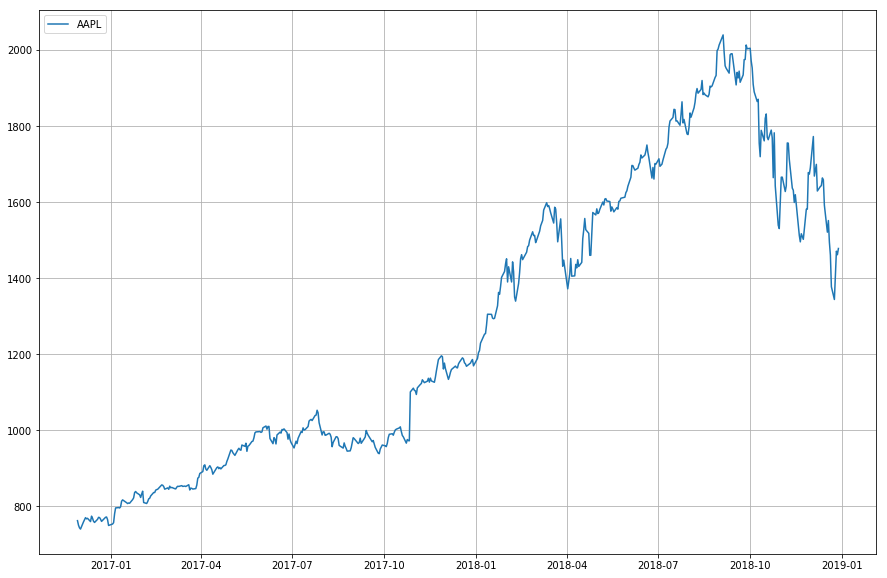

In [139]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(aapl_close['Close'],label='AAPL')
plt.legend(loc=2)

In [37]:
aapl_close["change"] = np.log(aapl_close["Close"] / aapl_close["Close"].shift())

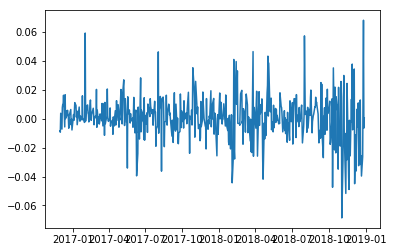

In [38]:
plt.plot(aapl_close.change)

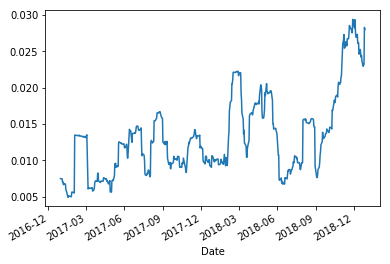

In [39]:
aapl_close['Volatility'] = aapl_close.change.rolling(21).std().shift()
aapl_close['Volatility'].plot()

In [40]:
aapl_close['exp_chng'] = aapl_close['Volatility'] * aapl_close['Close'].shift()
aapl_close['actual_chng'] = aapl_close['Close'] - aapl_close['Close'].shift()

In [41]:
aapl_close = pd.DataFrame(aapl_close.iloc[22:])

In [42]:
aapl_close['Magnitude'] = aapl_close['actual_chng'] / aapl_close['exp_chng']

In [43]:
aapl_close['abs_magni'] = np.abs(aapl_close['Magnitude'])
aapl_close.head()

,Close,change,Volatility,exp_chng,actual_chng,Magnitude,abs_magni
Date,,,,,,,
2016-12-30,115.820000,-0.007826,0.007485,0.873732,-0.910004,-1.041514,1.041514
2017-01-03,116.150002,0.002845,0.007440,0.861750,0.330002,0.382944,0.382944
2017-01-04,116.019997,-0.001120,0.006950,0.807248,-0.130005,-0.161047,0.161047
2017-01-05,116.610001,0.005072,0.006998,0.811950,0.590004,0.726651,0.726651
2017-01-06,117.910004,0.011087,0.006643,0.774655,1.300003,1.678170,1.678170


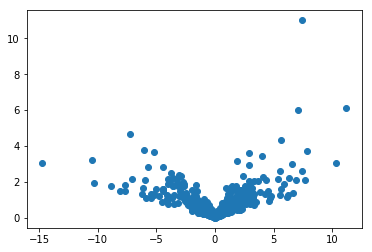

In [44]:
plt.scatter(aapl_close['actual_chng'], aapl_close['abs_magni'])